In [70]:
# import libraries

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [ ]:
%run ../data_processing.ipynb

In [72]:
# create a baseline classifier
def create_baseline():

    # init a sequential NN
    classifier = Sequential()

    # Define the model architecture
    
    # 1st layer - takes in input
    classifier.add(Dense(units=512, kernel_initializer='he_uniform',
                         activation='relu', input_dim=12))
    # 2nd layer
    classifier.add(Dense(units=128, kernel_initializer='he_uniform',
                         activation='relu'))
    # 3rd layer
    classifier.add(Dense(units=96, kernel_initializer='he_uniform',
                         activation='relu'))
    # output layer
    classifier.add(Dense(units=2, kernel_initializer='he_uniform',
                         activation='softmax'))

    return classifier

In [73]:
X_TRAIN = x_train
Y_TRAIN = y_train
X_VALID = x_valid
Y_VALID = y_valid
VALIDATION = (x_valid, y_valid)
EPOCHS = 50
BATCH_SIZE = 32
VERBOSE = 0

learning_rates = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
df_result = pd.DataFrame(columns=['learning_rate', 'training_loss',
                                  'training_accuracy', 'validation_loss',
                                  'validation_accuracy'])
df_result = df_result.iloc[0:0]

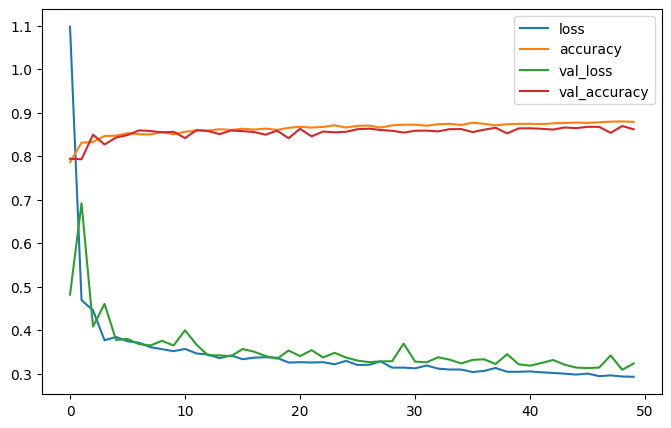

<Figure size 640x480 with 0 Axes>

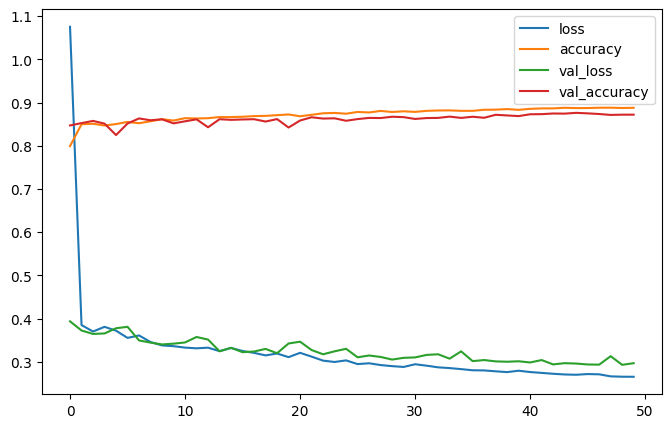

<Figure size 640x480 with 0 Axes>

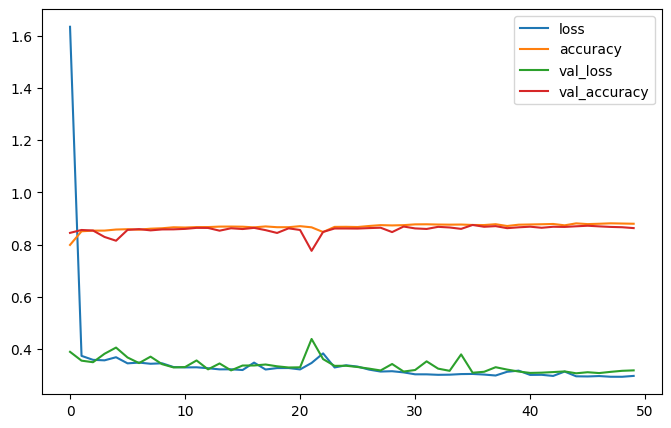

<Figure size 640x480 with 0 Axes>

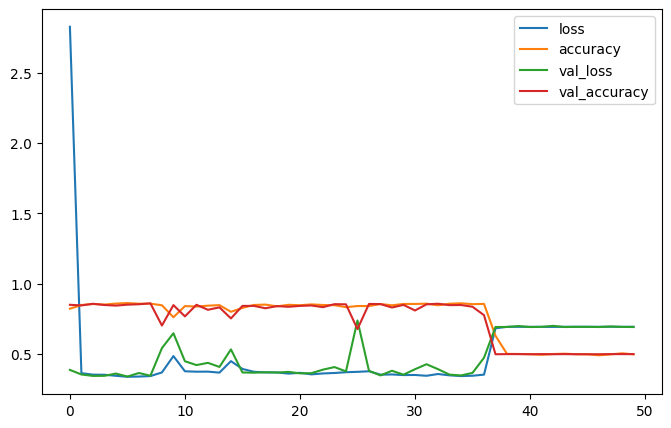

<Figure size 640x480 with 0 Axes>

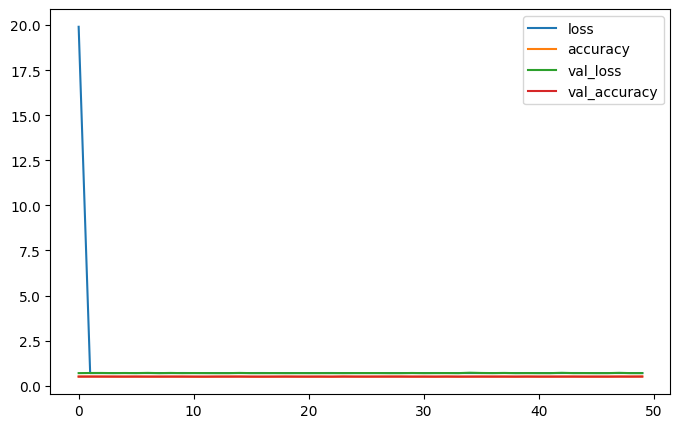

<Figure size 640x480 with 0 Axes>

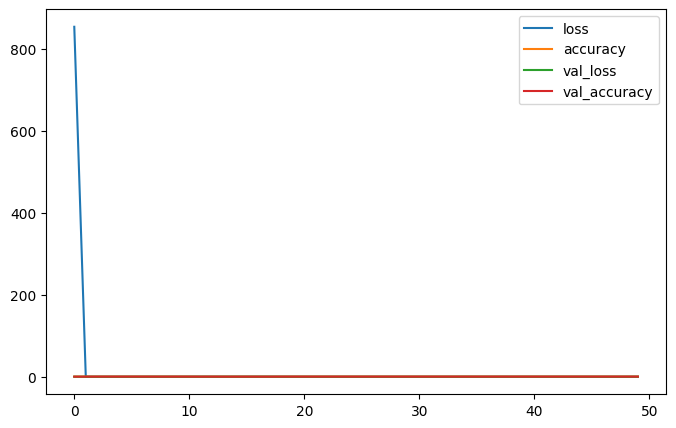

<Figure size 640x480 with 0 Axes>

In [74]:
for LEARNING_RATE in learning_rates:
    model = create_baseline()
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    history_001 = model.fit(X_TRAIN, Y_TRAIN, validation_data=VALIDATION,
                            epochs=EPOCHS, batch_size=BATCH_SIZE,
                            verbose=VERBOSE)

    # plot
    pd.DataFrame(history_001.history).plot(figsize=(8,5))
    plt.grid = True
    # plt.gca().set_ylim(0,1)
    plt.show()

    # save figure
    plt.savefig('figures/learning_rate_'+str(LEARNING_RATE)+'.png')

    # evaluation
    model_train_loss, model_train_accuracy = model.evaluate(X_TRAIN, Y_TRAIN,
                                                            verbose=VERBOSE)
    model_valid_loss, model_valid_accuracy = model.evaluate(X_VALID, Y_VALID,
                                                            verbose=VERBOSE)

    df_result = pd.concat([pd.DataFrame([[LEARNING_RATE, model_train_loss,
                                         model_train_accuracy,
                                         model_valid_loss,
                                         model_valid_accuracy]],
                                         columns=df_result.columns),
                                         df_result],
                                         ignore_index=True)

In [75]:
df_result

,learning_rate,training_loss,training_accuracy,validation_loss,validation_accuracy
0,0.300,0.486976,0.835338,0.492487,0.830126
1,0.100,0.693702,0.499925,0.693678,0.500301
2,0.030,0.693064,0.500075,0.692953,0.500601
3,0.010,0.297410,0.879850,0.317357,0.862898
4,0.003,0.263787,0.890376,0.296891,0.872219
5,0.001,0.295565,0.878797,0.323397,0.861696


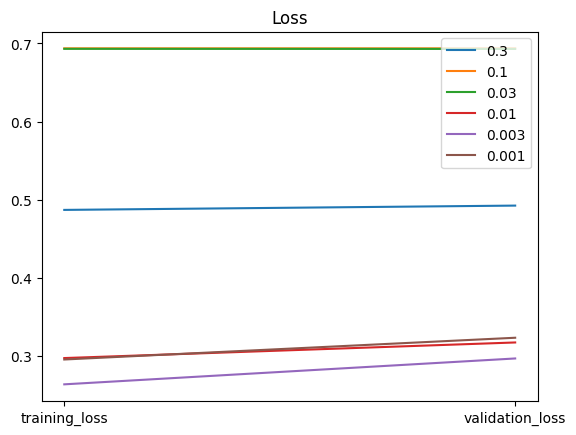

<Figure size 640x480 with 0 Axes>

In [76]:
x = ['training_loss', 'validation_loss']

for _idx in range(df_result.shape[0]):
    plt.plot(x, [df_result.iloc[_idx]['training_loss'],
                 df_result.iloc[_idx]['validation_loss']],
                 label=str(df_result.iloc[_idx]['learning_rate']))

plt.grid = True
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

plt.savefig('figures/loss.png')

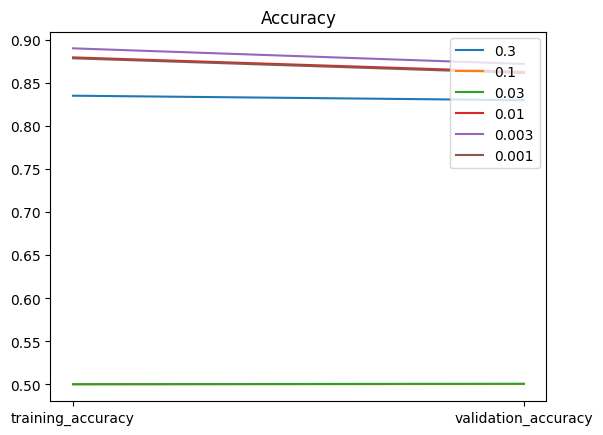

<Figure size 640x480 with 0 Axes>

In [77]:
x = ['training_accuracy', 'validation_accuracy']

for _idx in range(df_result.shape[0]):
    plt.plot(x, [df_result.iloc[_idx]['training_accuracy'],
                 df_result.iloc[_idx]['validation_accuracy']],
                 label=str(df_result.iloc[_idx]['learning_rate']))

plt.grid = True
plt.title('Accuracy')
plt.legend(loc='upper right')
plt.show()

plt.savefig('figures/accuracy.png')